In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [4]:
data = pd.read_csv('depression_data.csv',encoding='latin-1')
data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [5]:
DATASET_COLUMNS = ["target", "ids", "date", "flag", "user", "TweetText"]
data.columns = DATASET_COLUMNS

In [6]:
data.describe(include='all')


,target,ids,date,flag,user,TweetText
count,1.599999e+06,1.599999e+06,1599999,1599999,1599999,1599999
unique,NaN,NaN,774362,1,659775,1581465
top,NaN,NaN,Mon Jun 15 12:53:14 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,NaN,NaN,20,1599999,549,210
mean,2.000001e+00,1.998818e+09,NaN,NaN,NaN,NaN
std,2.000001e+00,1.935757e+08,NaN,NaN,NaN,NaN
min,0.000000e+00,1.467811e+09,NaN,NaN,NaN,NaN
25%,0.000000e+00,1.956916e+09,NaN,NaN,NaN,NaN
50%,4.000000e+00,2.002102e+09,NaN,NaN,NaN,NaN
75%,4.000000e+00,2.177059e+09,NaN,NaN,NaN,NaN


In [5]:
data.dtypes


target        int64
ids           int64
date         object
flag         object
user         object
TweetText    object
dtype: object

In [6]:
import copy
data_ = copy.deepcopy(data)

positif_data = data_[data_.target==4].iloc[:80000,:]
negative_data = data_[data_.target==0].iloc[:80000,:]

sub_data = pd.concat([positif_data,negative_data],axis=0)

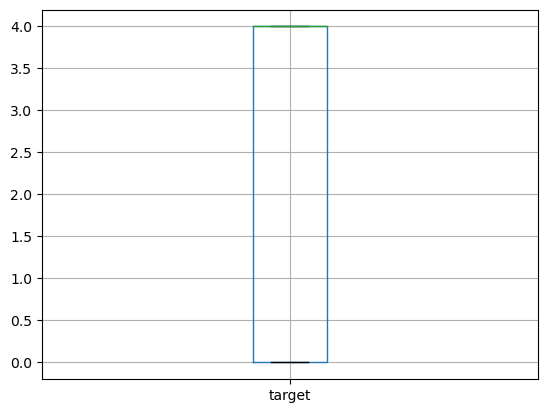

In [7]:
import matplotlib.pyplot as plt
#df1.plot()
data.boxplot(column='target')
plt.show()




In [8]:
data_target=data.groupby('target')


In [9]:
data['target'].value_counts()


target
4    800000
0    799999
Name: count, dtype: int64

In [10]:
data.head()


,target,ids,date,flag,user,TweetText
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [11]:
data_ = {'target': data['target'], 'date': data['date']}
df = pd.DataFrame(data_)
df.head()

,target,date
0,0,Mon Apr 06 22:19:49 PDT 2009
1,0,Mon Apr 06 22:19:53 PDT 2009
2,0,Mon Apr 06 22:19:57 PDT 2009
3,0,Mon Apr 06 22:19:57 PDT 2009
4,0,Mon Apr 06 22:20:00 PDT 2009


In [12]:
# lets ensure the 'date' column is in date format
df['date'] = pd.to_datetime(df['date'])


/Users/hemant./opt/anaconda3/lib/python3.9/site-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [13]:
hour = [ df['date'][i].hour for i in range(len(df['date'])) ]
df['hour'] = hour
df.head()

,target,date,hour
0,0,2009-04-06 22:19:49,22
1,0,2009-04-06 22:19:53,22
2,0,2009-04-06 22:19:57,22
3,0,2009-04-06 22:19:57,22
4,0,2009-04-06 22:20:00,22


In [14]:
hour_data = {'0': [0]*24, '2': [0]*24, '4': [0]*24}
for i in range(len(df['hour'])):
    target = str(df['target'][i])
    hour = int(df['hour'][i])
    hour_data[target][hour] += 1

In [15]:
hour_data = [hour_data['0'], hour_data['2'], hour_data['4']]
# Transpose
hour_data = list(map(list,zip(*hour_data)))

In [16]:
df1 = pd.DataFrame(hour_data,index = [i for i in range(24)],columns=['negative', 'neutral', 'positive'])

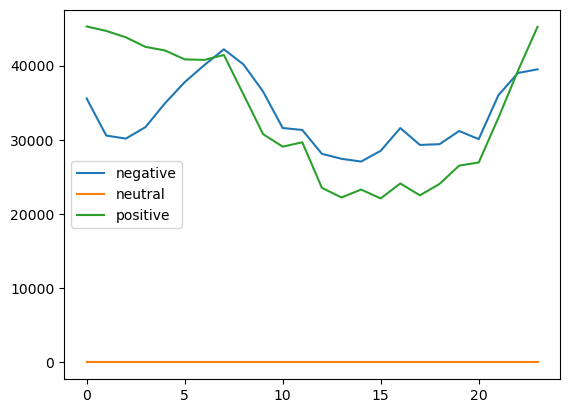

In [17]:
import matplotlib.pyplot as plt
df1.plot()
plt.show()


In [18]:
positive_at_count = 0
negative_at_count = 0
TweetTextList = list(sub_data['TweetText'])
targetList = list(sub_data['target'])
for i in range(len(sub_data['TweetText'])):
    if TweetTextList[i].find('@') != -1:
        if targetList[i] == 4:
            positive_at_count += 1
        else:
            negative_at_count += 1
at_counts = [positive_at_count, negative_at_count]

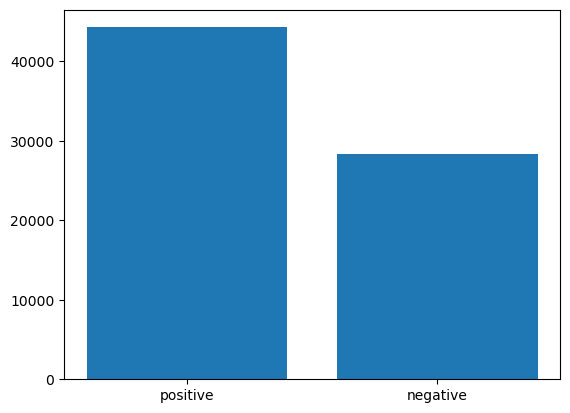

In [19]:
import matplotlib.pyplot as plt
names = ['positive', 'negative']
values = [positive_at_count, negative_at_count]
plt.bar(names, values)
plt.show()

In [20]:
import copy
newdata = copy.deepcopy(sub_data)
newdata.drop(['ids','date','flag','user'],axis = 1,inplace = True)

In [21]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

import re
import nltk
import string
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

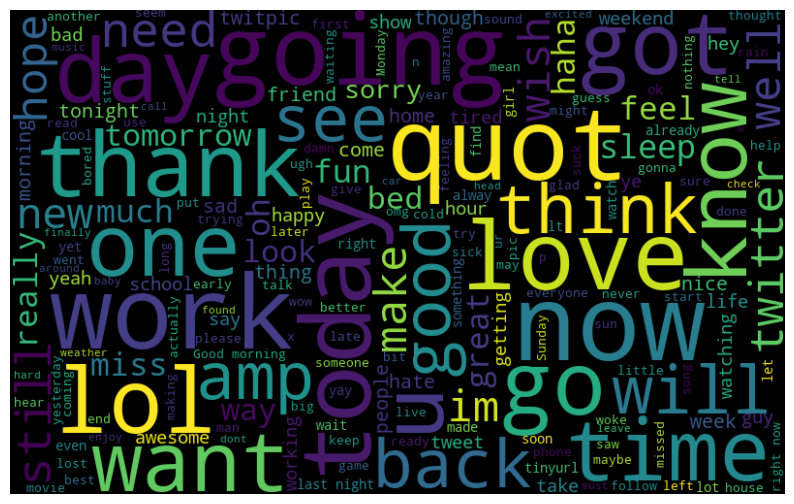

In [22]:
all_words = ' '.join([text for text in newdata['TweetText']])
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

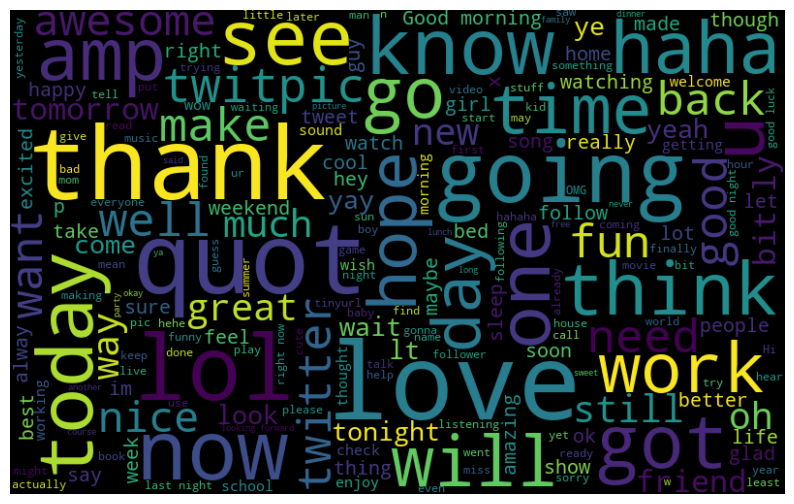

In [23]:
positive_words = ' '.join([text for text in data['TweetText'][data['target']==4]])
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(positive_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

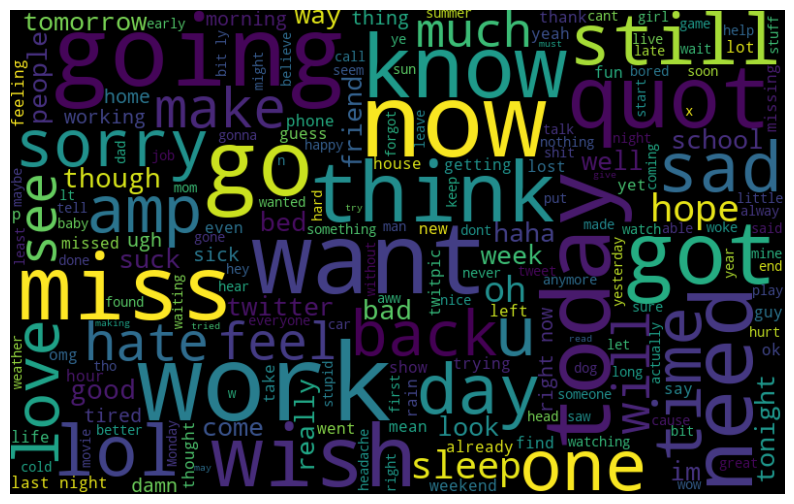

In [24]:
negative_words = ' '.join([text for text in data['TweetText'][data['target']==0]])
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

In [25]:
#DATA PREEPROCESSING
positif_data = data[data.target==4].iloc[:10000,:]
print(positif_data.shape)
negative_data = data[data.target==0].iloc[:10000,:]
print(negative_data.shape)
data = pd.concat([positif_data,negative_data],axis = 0)
print(data.shape)
data.head()

(10000, 6)
(10000, 6)
(20000, 6)


,target,ids,date,flag,user,TweetText
799999,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800000,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800001,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800002,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800003,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


In [26]:
# Removing Twitter Handles (@user)
data['Clean_TweetText'] = data['TweetText'].str.replace("@", "")
# Removing links
data['Clean_TweetText'] = data['Clean_TweetText'].str.replace(r"http\S+", "")
# Removing Punctuations, Numbers, and Special Characters
data['Clean_TweetText'] = data['Clean_TweetText'].str.replace("[^a-zA-Z]", " ")
# Remove stop words
import nltk
stopwords=nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda text : remove_stopwords(text.lower()))
data.head()

,target,ids,date,flag,user,TweetText,Clean_TweetText
799999,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!,love health4uandpets u guys r best!!
800000,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...,im meeting one besties tonight! cant wait!! - ...
800001,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...","darealsunisakim thanks twitter add, sunisa! go..."
800002,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...,sick really cheap hurts much eat real food plu...
800003,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn2 effect everyone


In [27]:
# Text tokenization and normalization
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: nltk.word_tokenize(x))
data.head()

,target,ids,date,flag,user,TweetText,Clean_TweetText
799999,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!,"[love, health4uandpets, u, guys, r, best, !, !]"
800000,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...,"[im, meeting, one, besties, tonight, !, cant, ..."
800001,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...","[darealsunisakim, thanks, twitter, add, ,, sun..."
800002,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...,"[sick, really, cheap, hurts, much, eat, real, ..."
800003,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,"[lovesbrooklyn2, effect, everyone]"


In [28]:
# now lets stitch these tokens back together
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x]))
# removing small words
data['Clean_TweetText'] = data['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data.head()

,target,ids,date,flag,user,TweetText,Clean_TweetText
799999,4,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!,love health4uandpets guys best
800000,4,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...,meeting besties tonight cant wait girl talk
800001,4,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S...",darealsunisakim thanks twitter sunisa meet sho...
800002,4,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...,sick really cheap hurts much real food plus fr...
800003,4,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn2 effect everyone


In [77]:
#MAIN MODEL 
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [78]:
count_vectorizer = CountVectorizer(stop_words='english')
cv = count_vectorizer.fit_transform(data['Clean_TweetText'])
cv.shape

(20000, 27258)

In [79]:
X_train,X_test,y_train,y_test = train_test_split(cv,data['target'] , test_size=.2,stratify=data['target'], random_state=42)

In [80]:
print("Unique values in y_train:", y_train.unique())
print("Unique values in y_test:", y_test.unique())


Unique values in y_train: [4 0]
Unique values in y_test: [4 0]


In [81]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
prediction_lr = lr.predict(X_test)
print(accuracy_score(prediction_lr, y_test))


0.709


In [82]:
# RANDOM FOREST CODE MODEL
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

batch_size = 32
progression = 0
limit = 0
rf = RandomForestClassifier(n_estimators=10)  # Keeping n_estimators low for each mini-batch. Adjust as needed.



In [83]:
m = X_train.shape[0]
for i in range(0, m, batch_size):
    x_batch = X_train[i:min(m, i + batch_size)].toarray()
    y_batch = y_train[i:min(m, i + batch_size)]
    rf.fit(x_batch, y_batch)


In [84]:
i = limit * batch_size
x_batch = X_train[i:min(m, i + batch_size)]
y_batch = y_train[i:min(m, i + batch_size)]
rf.fit(x_batch, y_batch)
limit = (limit + 1) % (m // batch_size)

predictions_rf = rf.predict(X_test)
accuracy = accuracy_score(predictions_rf, y_test)
print(f"accuracy hai FOR RANDOM FOREST {accuracy}")


accuracy hai FOR RANDOM FOREST 0.5025


In [97]:
# XGBC CODE FOR PREDICTION  
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# 1. Data Preparation with Label Encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train)  # Assuming y_train are your labels

# Split data (if not already split)
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_train, y_encoded, test_size=0.2, random_state=42)

# 2. Train the XGBoost Classifier
xgbc = XGBClassifier(max_depth=6, n_estimators=1000, nthread=3)
xgbc.fit(X_train_enc, y_train_enc)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, nthread=3, num_parallel_tree=None,
              predictor=None, ...)

In [98]:
# 3. Predict & Evaluate
predictions = xgbc.predict(X_test_enc)
accuracy = accuracy_score(predictions, y_test_enc)
print(f"Accuracy: {accuracy: f}")

Accuracy:  0.693750
